In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
tf.__version__

'2.3.0'

In [2]:
#Loading Data
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

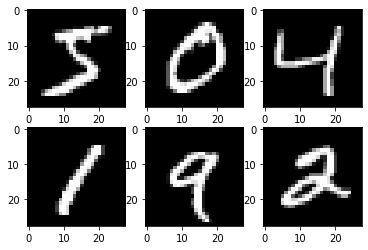

In [3]:
#Plotting sample images
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_train[i],cmap='gray')

In [4]:
#Normalise for values to be in [0,1]
x_train=x_train/255.0
x_test=x_test/255.0

In [5]:
encoder_input=keras.Input(shape=(28,28,1),name="image")
x=keras.layers.Flatten()(encoder_input)
encoder_output=keras.layers.Dense(9,activation="relu")(x)
encoder=keras.Model(encoder_input,encoder_output,name="encoder")
decoder_input=keras.layers.Dense(784,activation="relu")(encoder_output)
decoder_output=keras.layers.Reshape((28,28,1))(decoder_input)

opt=keras.optimizers.Adam(lr=0.001)
auto_encoder=keras.Model(encoder_input,decoder_output,name="autoencoder")
print(auto_encoder.summary())

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image (InputLayer)           [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 9)                 7065      
_________________________________________________________________
dense_1 (Dense)              (None, 784)               7840      
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
Total params: 14,905
Trainable params: 14,905
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
auto_encoder.compile(opt,loss="mse")

In [7]:
auto_encoder.fit(x_train,x_train,epochs=3,batch_size=32,validation_split=0.1)

Epoch 1/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0431 - val_loss: 0.0385
Epoch 2/3
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0386 - val_loss: 0.0382
Epoch 3/3
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0385 - val_loss: 0.0381


(10000, 28, 28)
(9,)


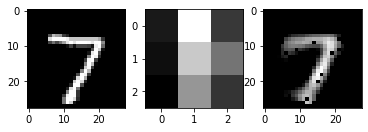

In [9]:
#Showing input,output for a sample image
print(x_test.shape)
example=encoder.predict(x_test[0].reshape(-1,28,28,1))[0]
print(example.shape)
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
ax1.imshow(x_test[0],cmap="gray")
ax2.imshow(example.reshape((3,3)),cmap="gray")
auto_encoder_out=auto_encoder.predict(x_test[0].reshape(-1,28,28,1))[0]
ax3.imshow(auto_encoder_out,cmap="gray")

In [41]:
x_train_compressed=encoder.predict(x_test)
print(x_train_compressed.shape)

(10000, 64)
